### Project 2
Multiclass Classification 

 Dataset: Iris 
    
 Steps: 
    
- 1. Train decision tree, KNN, and naive Bayes  
- 2. Evaluate using accuracy and macro/micro 
averaged F1-score 
- 3. Visualize confusion matrix 



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



Decision Tree
Accuracy : 0.9333333333333333
Macro F1 : 0.9326599326599326
Micro F1 : 0.9333333333333333

KNN
Accuracy : 0.9777777777777777
Macro F1 : 0.9777530589543938
Micro F1 : 0.9777777777777777

Naive Bayes
Accuracy : 0.9111111111111111
Macro F1 : 0.9107142857142857
Micro F1 : 0.9111111111111111


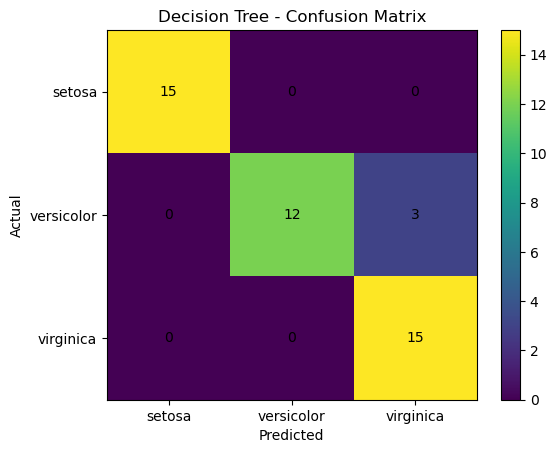

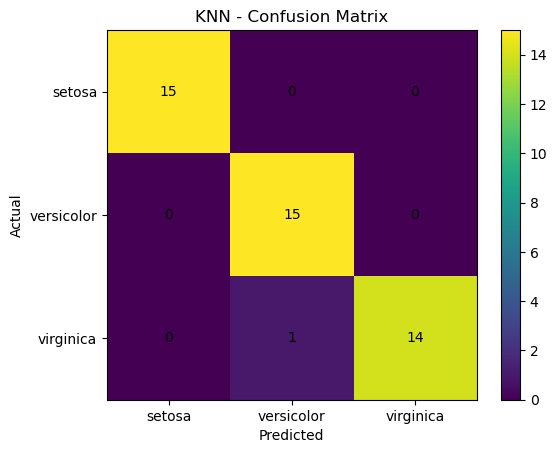

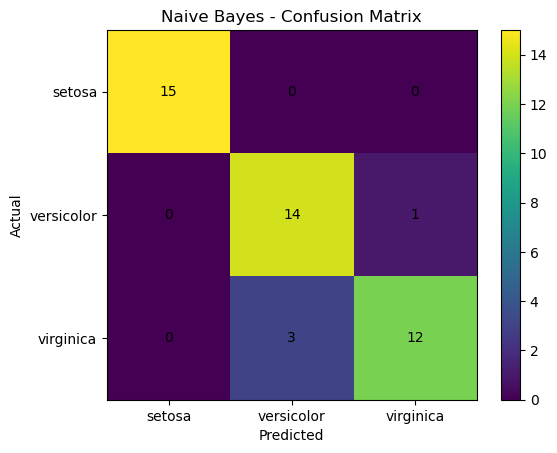

In [8]:
iris = load_iris()
X,y = iris.data, iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()    
}

predcitions = {}

for name, model in models.items():
    model.fit(X_train,y_train)
    predictions[name]=model.predict(X_test)
    
def confusion_matrix_manual(y_true,y_pred,n_classes):
    cm = np.zeros((n_classes,n_classes),dtype=int)
    for actual, pred in zip(y_true,y_pred):
        cm[actual][pred]+=1
    return cm
def accuracy_manual(cm):
    return np.trace(cm)/np.sum(cm)
def precision_recall_f1(cm):
    n_classes = cm.shape[0]
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1 = np.zeros(n_classes)
    
    for i in range(n_classes):
        TP = cm[i,i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        
        precision[i] = TP/(TP+FP) if (TP+FP)>0 else 0
        recall[i] = TP/(TP+FN) if (TP+FN) > 0 else 0
        f1[i] = (
            2*precision[i]*recall[i]/(precision[i]+recall[i])
            if (precision[i]+recall[i])>0 else 0
        )
        
    return precision,recall,f1

# Macro and Micro f1 (from Scratch)
def macro_f1(f1):
    return np.mean(f1)
def micro_f1(cm):
    TP =np.trace(cm)
    FP = cm.sum(axis=0).sum()-TP
    FN = cm.sum(axis=1).sum()-TP
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    return 2*precision*recall/(precision+recall)

# Evalueate the model
for name, y_pred in predictions.items():
    cm = confusion_matrix_manual(y_test, y_pred, n_classes=3)
    acc = accuracy_manual(cm)
    _, _, f1 = precision_recall_f1(cm)

    print(f"\n{name}")
    print("Accuracy :", acc)
    print("Macro F1 :", macro_f1(f1))
    print("Micro F1 :", micro_f1(cm))

# Visualize Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(3), class_names)
    plt.yticks(range(3), class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for i in range(3):
        for j in range(3):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()

for name, y_pred in predictions.items():
    cm = confusion_matrix_manual(y_test, y_pred, 3)
    plot_confusion_matrix(cm, f"{name} - Confusion Matrix")


### Project 3: Threshold Tuning and ROC-AUC 
 For logistic regression: 
- 1. Predict probabilities instead of classes 
- 2. Plot ROC curve 
- 3. Choose optimal threshold for classification 
- 4. Evaluate impact on precision, recall, F1 




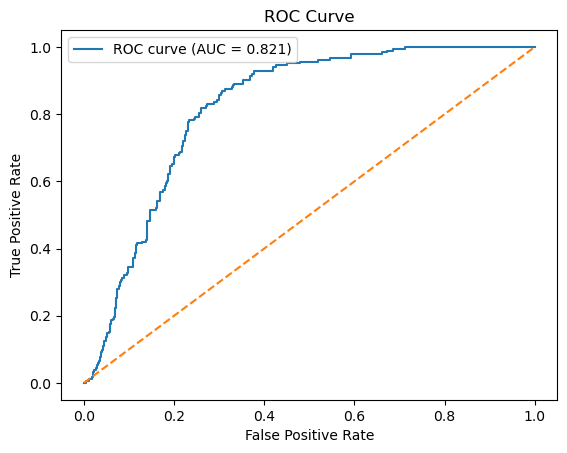

Threshold | Precision | Recall | F1-score
------------------------------------------
     0.10|    0.100| 0.962|  0.600
     0.20|    0.200| 0.929|  0.667
     0.30|    0.300| 0.820|  0.680
     0.40|    0.400| 0.672|  0.632
     0.50|    0.500| 0.519|  0.551
     0.60|    0.600| 0.328|  0.423
     0.70|    0.700| 0.148|  0.234
     0.80|    0.800| 0.044|  0.079
     0.90|    0.900| 0.005|  0.011

 Best Threshold based of f1-score:
Threshold =  0.30,F1=0.680


C:\Users\Ganesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

X, y = make_classification(
    n_samples=2000,
    n_features = 10,
    n_informative=5,
    n_redundant=2,
    weights=[0.7,0.30],# imbalance dataset
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr , thresholds = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test,y_prob)

plt.figure()
plt.plot(fpr,tpr,label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Threshold tuning
def evaluate_threshold(threshold):
    y_pred = (y_prob>=threshold).astype(int)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return precision, recall, f1

thresholds_to_test = np.arange(0.1,0.91,0.1)

print("Threshold | Precision | Recall | F1-score")
print("------------------------------------------")

for t in thresholds_to_test:
    p,r,f1 = evaluate_threshold(t)
    print(f"{t:9.2f}|{t:9.3f}|{r:6.3f}|{f1:7.3f}")
    
# Find threshold with maximum F1-score 
best_threshold = 0
best_f1 = 0

for t in np.linspace(0.01,0.99,99):
    _,_,f1 = evaluate_threshold(t)
    if f1> best_f1:
        best_f1 = f1
        best_thershold = t
print("\n Best Threshold based of f1-score:")
print(f"Threshold = {best_thershold: .2f},F1={best_f1:.3f}")

### The same workflow applied to a real, standard dataset: the Breast Cancer Wisconsin dataset from sklearn.

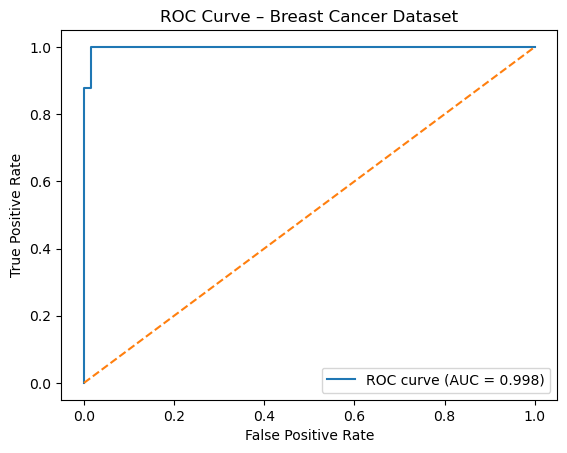

Threshold | Precision | Recall | F1-score
-----------------------------------------
     0.10|    0.922| 1.000|  0.960
     0.20|    0.922| 1.000|  0.960
     0.30|    0.973| 1.000|  0.986
     0.40|    0.991| 0.991|  0.991
     0.50|    0.991| 0.991|  0.991
     0.60|    0.990| 0.963|  0.976
     0.70|    0.990| 0.944|  0.967
     0.80|    0.990| 0.944|  0.967
     0.90|    1.000| 0.850|  0.919

 Best threshold based on F1-score:
Threshold = 0.36,F1-score = 0.995


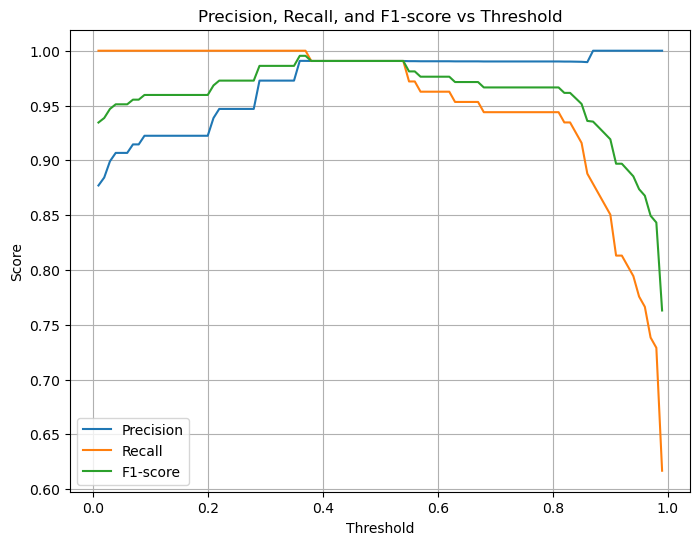

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

data = load_breast_cancer()
X, y = data.data, data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test,y_prob)

plt.figure()
plt.plot(fpr,tpr,label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Breast Cancer Dataset")
plt.legend()
plt.show()

# Threshold Tuning 
def evaluate_threshold(threshold):
    y_pred = (y_prob>=threshold).astype(int)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return precision, recall, f1

print("Threshold | Precision | Recall | F1-score")
print("-----------------------------------------")

for t in np.arange(0.1,0.91,0.1):
    p,r,f1 = evaluate_threshold(t)
    print(f"{t:9.2f}|{p:9.3f}|{r:6.3f}|{f1:7.3f}")
    
best_threshold = 0
best_f1 = 0

for t in np.linspace(0.01,0.99,99):
    _,_,f1 = evaluate_threshold(t)
    if f1> best_f1:
        best_f1 = f1
        best_threshold = t  

print("\n Best threshold based on F1-score:")
print(f"Threshold = {best_threshold:.2f},F1-score = {best_f1:.3f}")

# Precision, Recall, F1 vs Threshold 
from sklearn.metrics import precision_score,recall_score,f1_score

thresholds = np.linspace(0.01,0.99,99)

precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred = (y_prob>= t).astype(int)
    precision_list.append(precision_score(y_test,y_pred))
    recall_list.append(recall_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred))
    
plt.figure(figsize=(8,6))
plt.plot(thresholds,precision_list,label="Precision")
plt.plot(thresholds,recall_list,label="Recall")
plt.plot(thresholds,f1_list,label="F1-score")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()